# FindDefault: Prediction of Credit Card fraud

### 1. Problem Statement

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Let us begin by importing the required libraries

In [4]:
# Import libraries
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy import stats

from sklearn.model_selection import train_test_split


from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1)

rcParams['figure.figsize'] = 10, 5

RANDOM_SEED = 42
LABELS = ["Legit", "Fraud"]

import warnings
warnings.filterwarnings("ignore")

### 2. The Dataset
This provided credit_card.csv dataset contains 492 frauds out of 284,807 transactions. 

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- Data has 31 features from V1-V28 & Time, Amount and Class
- Input features: V1-V28, Time and Amount
- Target variable: Class

In [5]:
# Read Data
df = pd.read_csv('D:/Giggi/FindDefault/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 3. Data Exploration

- The Data does not have any missing values which is evident from the above result and hence, need not be handled.
- The Data has only Target Variable Class as the categorical variable.
- Remaining Features are numerical and need to be only standardized for comparison after balancing the dataset.
- The Time is distributed throughout the data equitably and hence, serves as an independent feature.

We now label the class feature as below
- Class:1 = fraud
- Class:2 = legit

In [6]:
# Label the class
fraud = df[df.Class == 1]
legit = df[df.Class == 0]

In [7]:
# Describe Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Print data columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Check missing data values
df.isnull().values.any()

False

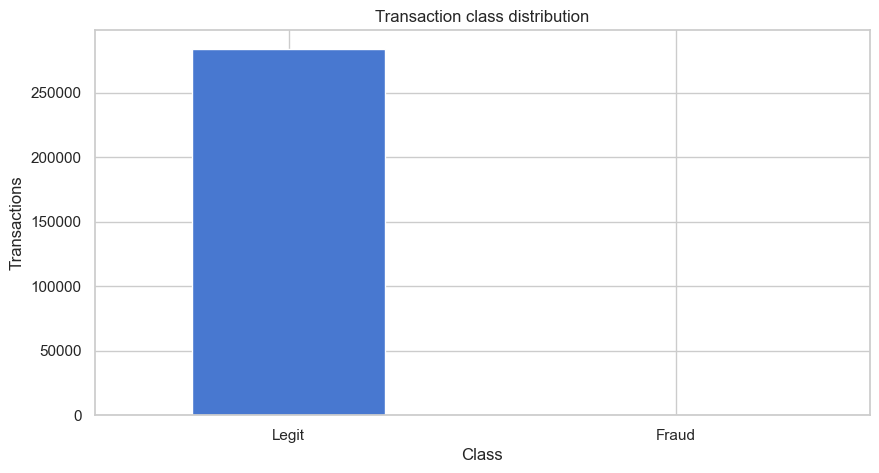

In [10]:
# Display a countplot
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Transactions");

- The Dataset is highly imbalanced as evident from the countplot with majoritarian class label 'Legit' and minority class label 'Fraud'
- Thus, if we run the model on such imbalanced data we may end up highly overfitting it on the data and resulting in non-deployable model
- Hence, we will perform Synthetic Minority Oversampling on the data to balance it out as shown later after exploring other features.

#### Let us try to determine the nature of transactions which are fraud and obtain a relevant set of the same with respect to their amount.

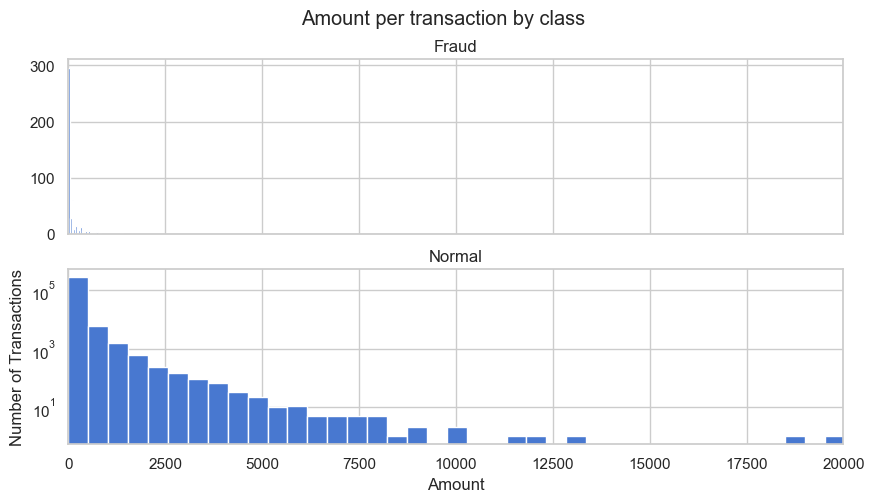

In [11]:
# Display a histogram
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

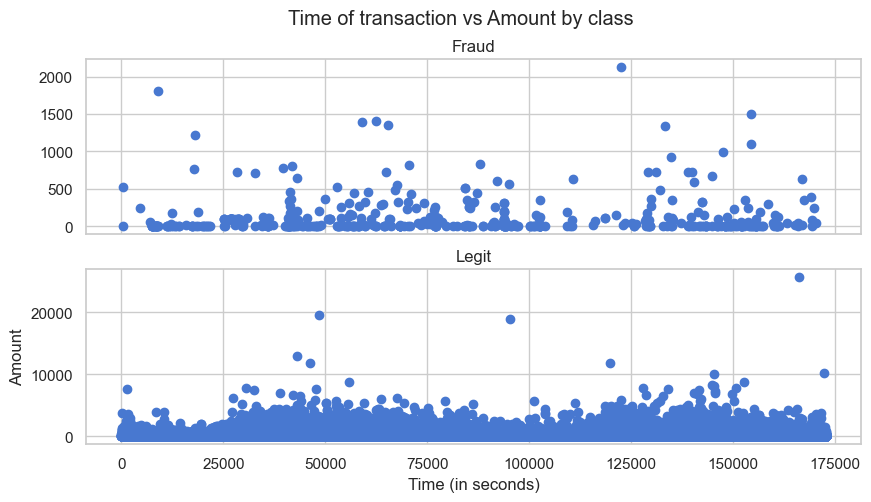

In [12]:
# Display a scatter plot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

It can also be observed that the fraud transactions are evenly distributed about time. Also the fraud transactions amounts seems to be not more than 2500.

#### Let us try to prove the above insights related to fraud transactions amount & time.

In [13]:
# Transactions count on amount
amount_more = 0
amount_less = 0

for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1

print(amount_more)
print(amount_less)

449
284358


In [14]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.84234938045763

Hence, we observe that the 99.85% of transactions amount to less than 2500. 
#### Let us see how many of these are fraud and others legitimate.

In [15]:
# Classified transactions
frd = 0
lgt = 1

for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            lgt += 1
        else:
            frd+=1

print(frd)
print(lgt)

492
283867


In [16]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Thus, we can conclude that since the number of fraud transaction below the amount of 2500 is same as the number of total fraud transactions. Hence, all fraud transactions are less than 2500.

### 4. Data Preparation

From the above distribution plot, it is clear that the fraudulent transactions are spread throughout the time period

#### Let’s drop the Time column (not going to use it) and use the scikit’s StandardScaler on the Amount. The scaler removes the mean and scales the values to unit variance.

In [17]:
# Remove time column
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

#### Let's train our Autoencoder to detect any anomaly on new transactions that are normal and legit. Reserving the correct class on the test set will give us a way to evaluate the performance of our model. We will reserve 20% of our data for testing.

In [18]:
# Train auto encoder
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [19]:
X_train.shape

(227451, 29)

### 5. Data Modelling
- Study the Feature Correlations of the given data
- Plot a Heatmap
- Run GridSearch on the Data
- Fine Tune the Classifiers
- Create Pipelines for evaluation

#### Our Autoencoder uses 4 fully connected layers with 14, 7, 7 and 29 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder. Additionally, L1 regularization will be used during training:

In [20]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [21]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

#### Let’s train our model for 100 epochs with a batch size of 32 samples and save the best performing model to a file. The ModelCheckpoint provided by Keras is really handy for such tasks. Additionally, the training progress will be exported in a format that TensorBoard understands.

In [22]:
from keras.callbacks import ModelCheckpoint, TensorBoard

nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

# Ensure the directory exists
import os
os.makedirs('Desktop/Capstone Project', exist_ok=True)

# Use .keras extension for the model checkpoint
checkpointer = ModelCheckpoint(filepath="Desktop/Capstone Project/trained_model.keras",
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history


Epoch 1/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.5004 - loss: 0.8942 - val_accuracy: 0.6617 - val_loss: 0.7917
Epoch 2/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.6676 - loss: 0.7591 - val_accuracy: 0.6803 - val_loss: 0.7742
Epoch 3/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.6812 - loss: 0.7269 - val_accuracy: 0.6836 - val_loss: 0.7664
Epoch 4/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.6872 - loss: 0.7414 - val_accuracy: 0.6849 - val_loss: 0.7610
Epoch 5/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.6890 - loss: 0.7326 - val_accuracy: 0.6855 - val_loss: 0.7574
Epoch 6/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6885 - loss: 0.7176 - val_accuracy: 0.6867 - val_loss: 0.7572
Epoch 7/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.6903 - loss: 0.7276 - val_accuracy: 0.6872 - val_loss: 0.7580
Epoch 8/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6899 - l

In [23]:
# Load the model to autoencoder
autoencoder = load_model('trained_model.h5')

### 6. Model Evaluation
The best performing trained model has been loaded to the auto encoder. Now we can evaluate the effectiveness of the model by conducting various tests finding errors/loss.

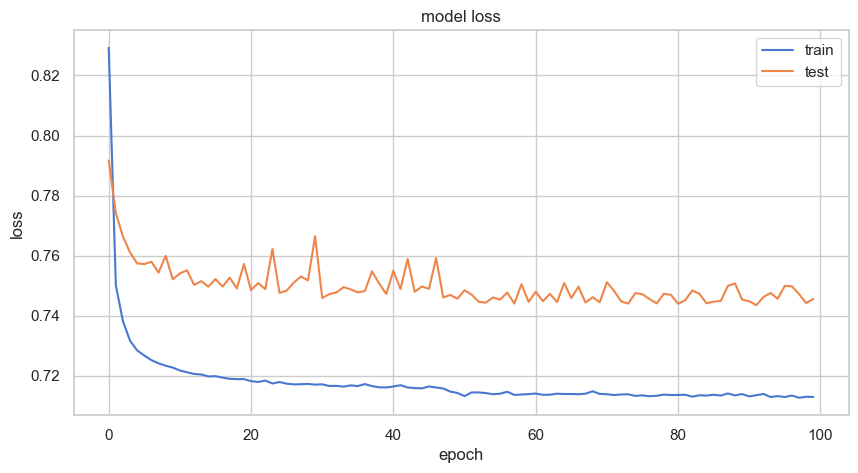

In [24]:
# Display a line chart
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

#### Let's have a look at how the error is distributed.

In [25]:
# Predict the autoencoder error
predictions = autoencoder.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step


In [26]:
# Classify as the reconstruction error
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [27]:
# Describe the error data
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.729377,0.001720
std,3.377687,0.041443
min,0.059653,0.000000
25%,0.236277,0.000000
50%,0.384439,0.000000
75%,0.604821,0.000000
max,250.607219,1.000000


### 6(a). Reconstruction error without fraud

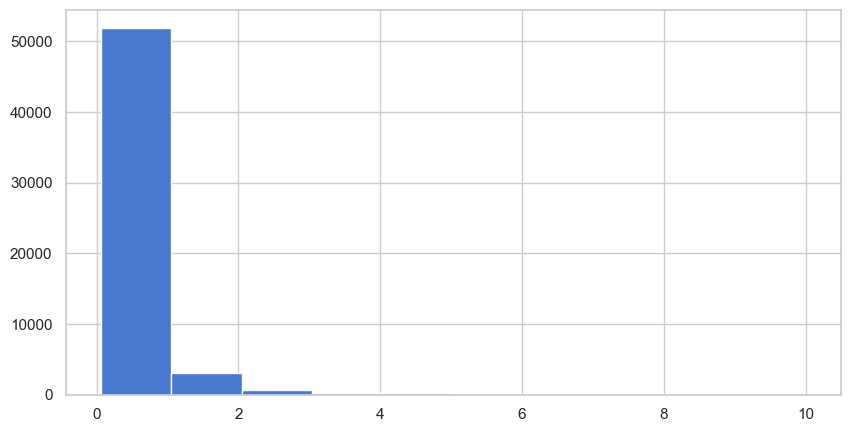

In [28]:
# Display a bar chart
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [29]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

#### Let us make use of ROC curves, a very useful tool for understanding the performance of binary classifiers.

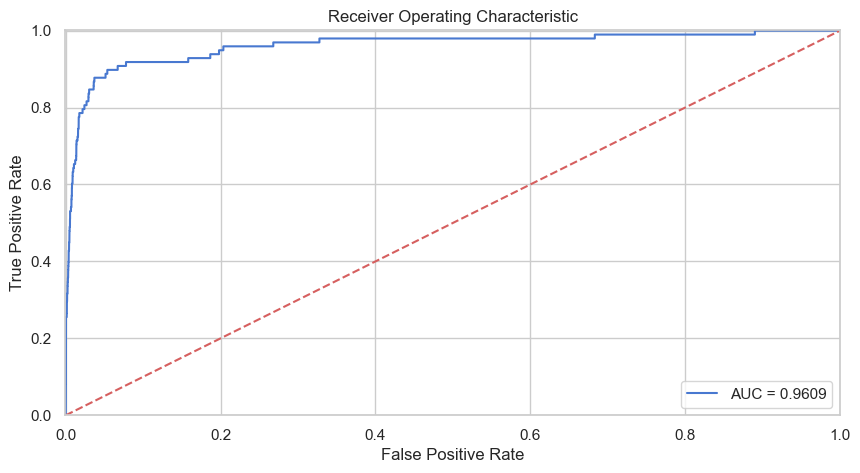

In [30]:
# Generate an ROC curve
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

The ROC curve plots the true positive rate versus the false positive rate, over different threshold values. Basically, we want the blue line to be as close as possible to the upper left corner. While our results look pretty good, we have to keep in mind of the nature of our dataset.

In [31]:
# Create Train and Test Data in ratio 70:30
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Target Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### 6(b). Precision vs Recall
High recall but low precision means many results, most of which has low or no relevancy. When precision is high but recall is low we have the opposite - few returned results with very high relevancy. Ideally, you would want high precision and high recall - many results with that are highly relevant.

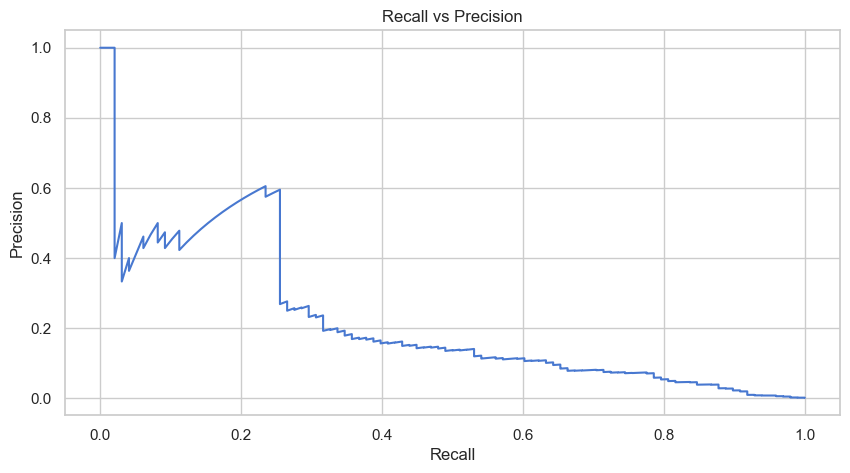

In [32]:
# Display Line plot - recall vs precision
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

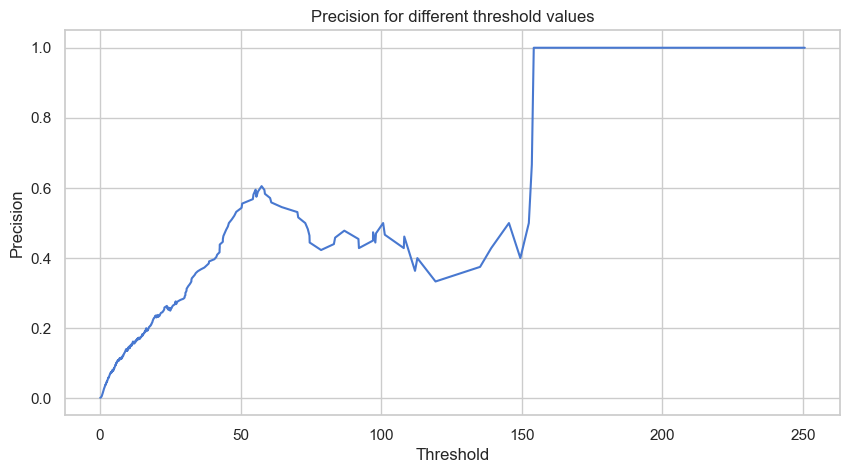

In [33]:
# Display line plot - precision
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

You can see that as the reconstruction error increases our precision rises as well. Let’s have a look at the recall:

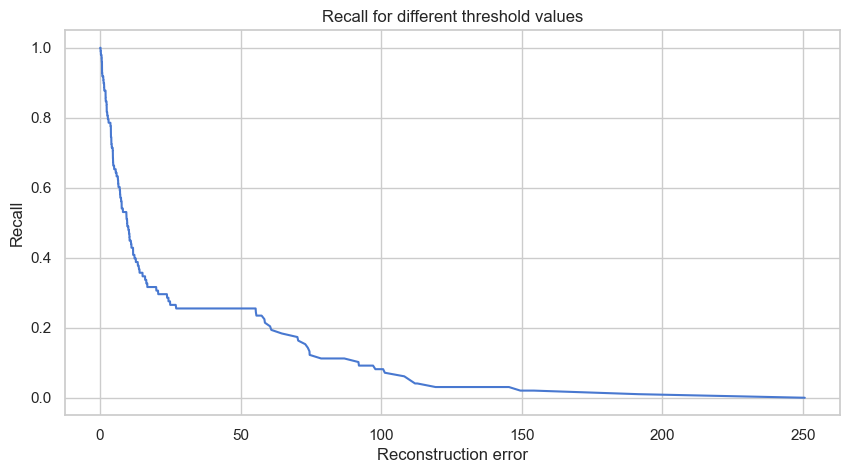

In [34]:
# Display line plot - recall
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

Here, we have the exact opposite situation. As the reconstruction error increases the recall decreases.

### 7. Prediction

Our model is a bit different this time. It doesn’t know how to predict new values. But we don’t need that. In order to predict whether or not a new/unseen transaction is normal or fraudulent, we’ll calculate the reconstruction error from the transaction data itself. If the error is larger than a predefined threshold, we’ll mark it as a fraud (since our model should have a low error on normal transactions). Let’s pick that value:

In [35]:
# Set threshold
threshold = 3.1

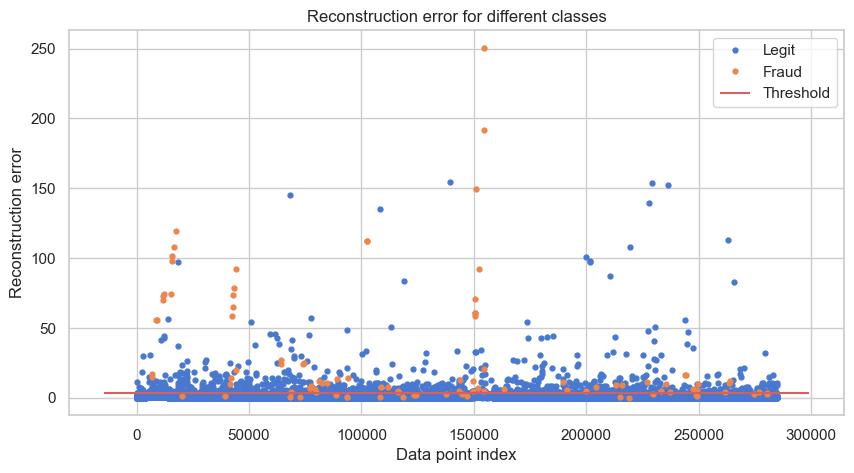

In [36]:
# Display scatter plot - error reconstruction
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Legit")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

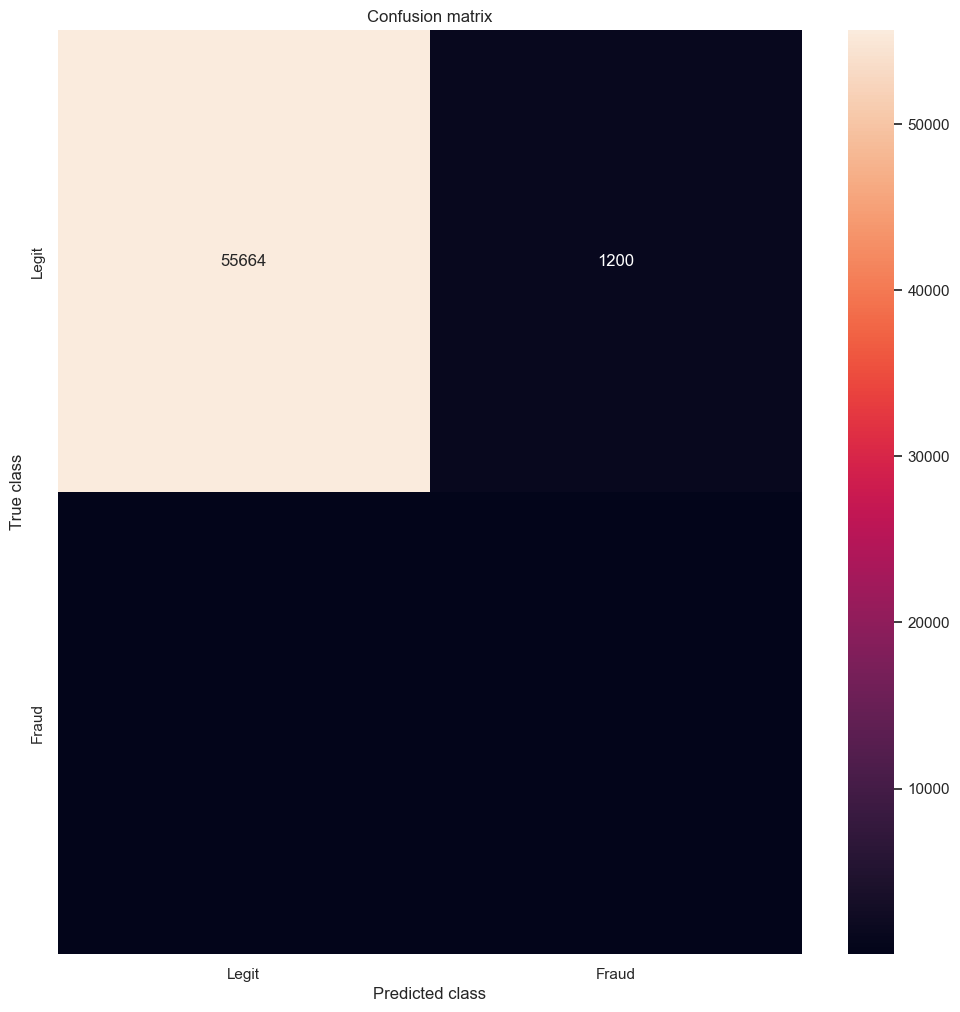

In [37]:
# Display heat map - confusion matrix
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Our model seems to catch a lot of the fraudulent cases, but there is a catch. The number of legitimate transactions classified as frauds is really high. This might be a problem (probably not). You might want to increase or decrease the value of the threshold, depending on the problem. Current value has been tested from 3.1 to 10 for getting better accuracy.

### Conclusion

We have created a simple Deep Autoencoder in Keras that can reconstruct what a legitimate transaction can look like. Our dataset was in such a state that we really don’t know what the original features look like.

Keras gave us very clean and easy to use API to build a non-trivial Deep Autoencoder.